In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # OpenCV for edge detection
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

In [5]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
# Function to preprocess and extract Canny edge features
def extract_canny_features(images):
    edge_features = []
    for image in images:
        # Convert to grayscale
        gray = rgb2gray(image)
        # Resize to 32x32 for consistency
        resized = resize(gray, (32, 32))
        # Convert to uint8 for Canny
        uint8_img = (resized * 255).astype(np.uint8)
        # Apply Canny edge detection
        edges = cv2.Canny(uint8_img, threshold1=100, threshold2=200)
        # Flatten the edge map into a feature vector
        edge_features.append(edges.flatten())
    return np.array(edge_features)

In [7]:
# Extract Canny edge features for training and testing images (subset for efficiency)
X_train_canny = extract_canny_features(X_train[:5000])
X_test_canny = extract_canny_features(X_test[:1000])

In [8]:
# Normalize features
scaler = StandardScaler()
X_train_canny = scaler.fit_transform(X_train_canny)
X_test_canny = scaler.transform(X_test_canny)

In [9]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train_canny, y_train[:5000])  # Train on subset

RandomForestClassifier(n_jobs=-1, random_state=42)

In [10]:
# Predictions
y_pred = clf.predict(X_test_canny)

Accuracy: 0.224
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.40      0.34       103
           1       0.19      0.17      0.18        89
           2       0.32      0.38      0.35       100
           3       0.17      0.15      0.16       103
           4       0.12      0.13      0.13        90
           5       0.14      0.16      0.15        86
           6       0.21      0.14      0.17       112
           7       0.23      0.17      0.19       102
           8       0.25      0.33      0.29       106
           9       0.25      0.19      0.22       109

    accuracy                           0.22      1000
   macro avg       0.22      0.22      0.22      1000
weighted avg       0.22      0.22      0.22      1000



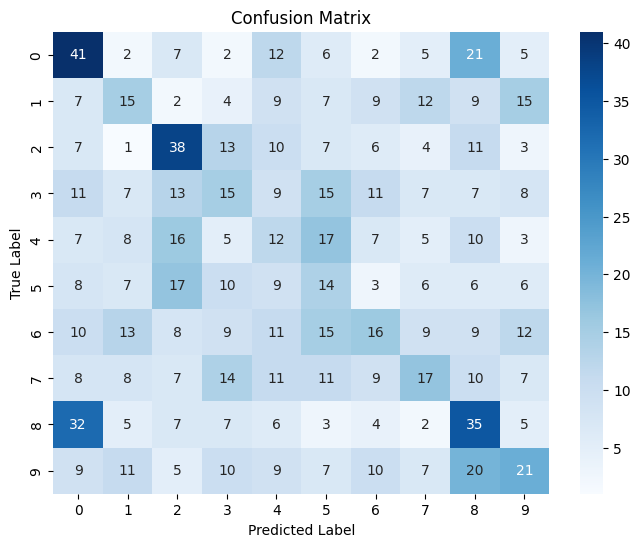

In [11]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test[:1000], y_pred))
print("Classification Report:\n", classification_report(y_test[:1000], y_pred))
# Compute confusion matrix
cm = confusion_matrix(y_test[:1000], y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()